In [47]:
import json
from collections import defaultdict
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
from rliable import plot_utils
plt.rcParams['text.usetex'] = False #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = ['Helveta Nue'] # Choose a nice font here
sns.set_style("whitegrid")

COLORS = ['#BBCC33', '#77AADD', '#44BB99',
           '#EEDD88', '#EE8866', '#FFAABB',
          '#99DDFF', '#44BB99', '#AAAA00',
          '#DDDDDD']
palette = sns.set_palette(COLORS)

### Load data

In [48]:
START_STEP = 0
END_STEP = 120
TEST_FREQ = 12

In [49]:
folder_to_step_to_rollouts = defaultdict(lambda: dict())

for folder in ['difficulty', 'length', 'base', 'both']:
    for step in range(START_STEP, END_STEP + 1, TEST_FREQ):
        rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/{folder}/{step}_rollouts.json"
        with open(rollouts_file, 'r') as f:
            folder_to_step_to_rollouts[folder][step] = json.load(f)

### Lengths

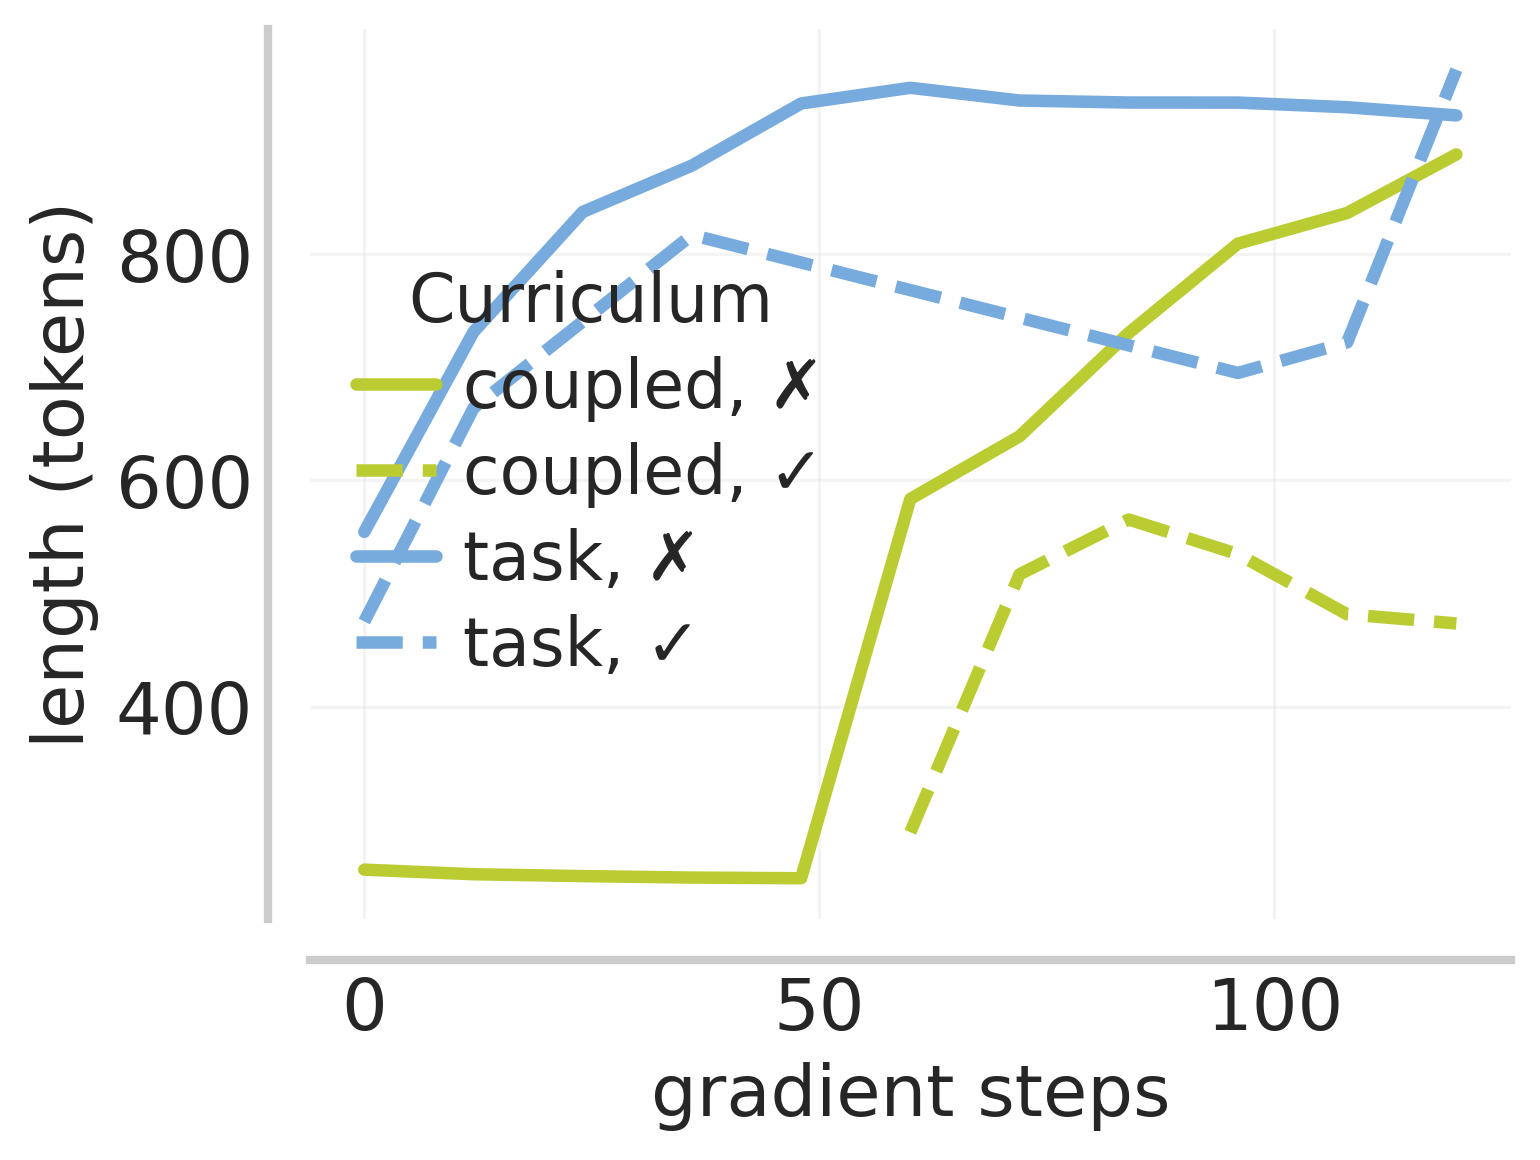

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
fig.set_size_inches(496.0/192*2, 369.6/192*2)

for folder in ['both', 'difficulty']:
    
    lengths_0 = []
    lengths_1 = []
    
    for step in range(START_STEP, END_STEP + 1, TEST_FREQ):
        rollouts = folder_to_step_to_rollouts[folder][step]
        
        total_0_length = 0
        total_1_length = 0
        total_0 = 0
        total_1 = 0
        for rollout in rollouts:
            if rollout['ref_score'] != 6:
                continue
            if rollout['score'] == 0:
                total_0_length += rollout['length']
                total_0 += 1
            elif rollout['score'] == 1:
                total_1_length += rollout['length']
                total_1 += 1
        
        if total_0 != 0:
            lengths_0.append(total_0_length / total_0)
        else:
            lengths_0.append(np.nan)
        if total_1 != 0:
            lengths_1.append(total_1_length / total_1)
        else:
            lengths_1.append(np.nan)
    
    if folder == 'both':
        text = r'coupled'
    else:
        text = r'task'

    sns.lineplot(x=range(START_STEP, END_STEP + 1, TEST_FREQ), y=lengths_0, ax=ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], label=f'{text}, ✗', linestyle='-')
    sns.lineplot(x=range(START_STEP, END_STEP + 1, TEST_FREQ), y=lengths_1, ax=ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], label=f'{text}, ✓',  linestyle='--')


plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='length (tokens)',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)

ax.legend(
        prop={'size': 16},         # Slightly smaller font
        title='Curriculum',
        title_fontsize=16,
        ncol=1,                    # Keep 1 column
        frameon=False,             # No box
        handlelength=1.2,          # Shrink line length
        handletextpad=0.4,         # Shrink space between marker and text
        borderpad=0.2,             # Shrink border padding inside legend box
        labelspacing=0.3,          # Reduce vertical space between entries
        markerscale=0.8,            # Shrink marker size
        # bbox_to_anchor=(-0.1, 1)
    )

plt.savefig("plots/difficulty/length_6.pdf", bbox_inches='tight',pad_inches=0)
plt.show()

### Attempts

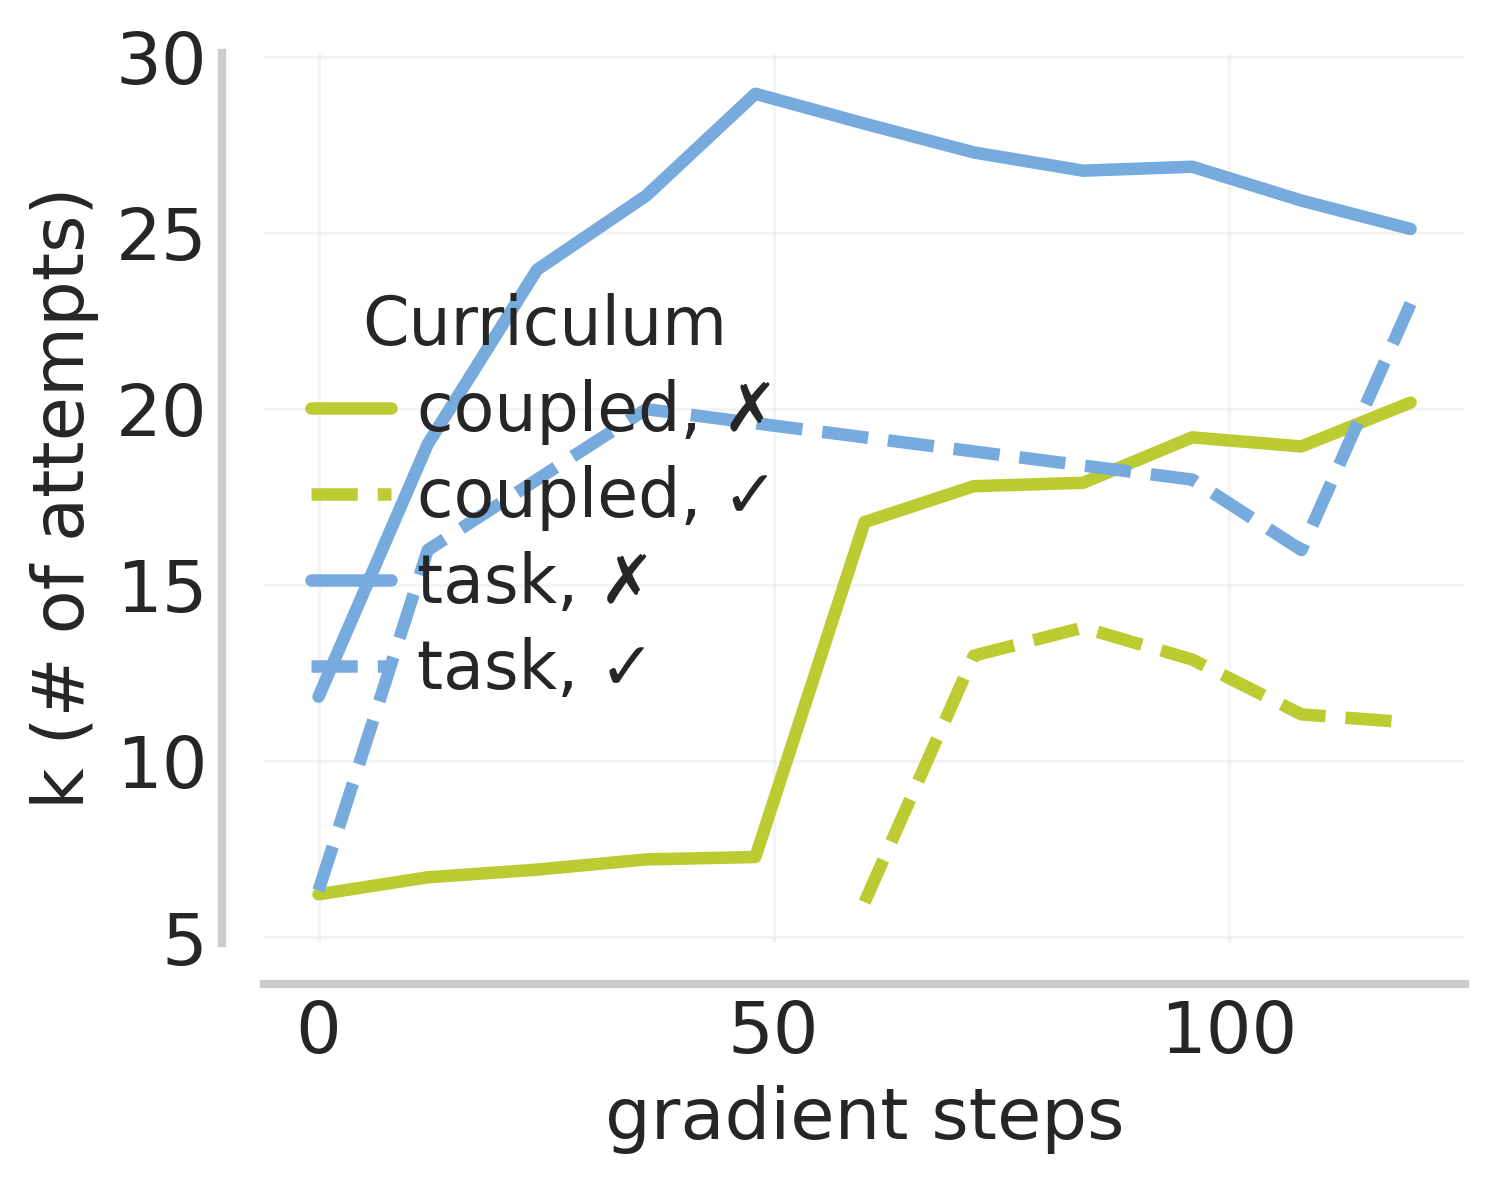

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
fig.set_size_inches(496.0/192*2, 369.6/192*2)

for folder in ['both', 'difficulty']:
    
    lengths_0 = []
    lengths_1 = []
    
    for step in range(START_STEP, END_STEP + 1, TEST_FREQ):
        rollouts = folder_to_step_to_rollouts[folder][step]
        
        total_0_length = 0
        total_1_length = 0
        total_0 = 0
        total_1 = 0
        for rollout in rollouts:
            if rollout['ref_score'] != 6:
                continue
            if rollout['score'] == 0:
                total_0_length += len(rollout['output'].split('\n\n'))
                total_0 += 1
            elif rollout['score'] == 1:
                total_1_length += len(rollout['output'].split('\n\n'))
                total_1 += 1
        
        if total_0 != 0:
            lengths_0.append(total_0_length / total_0)
        else:
            lengths_0.append(np.nan)
        if total_1 != 0:
            lengths_1.append(total_1_length / total_1)
        else:
            lengths_1.append(np.nan)

    if folder == 'both':
        text = r'coupled'
    else:
        text = r'task'

    sns.lineplot(x=range(START_STEP, END_STEP + 1, TEST_FREQ), y=lengths_0, ax=ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], label=f'{text}, ✗', linestyle='-')
    sns.lineplot(x=range(START_STEP, END_STEP + 1, TEST_FREQ), y=lengths_1, ax=ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], label=f'{text}, ✓',  linestyle='--')



plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='k (# of attempts)',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)

ax.legend(
        prop={'size': 16},         # Slightly smaller font
        title='Curriculum',
        title_fontsize=16,
        ncol=1,                    # Keep 1 column
        frameon=False,             # No box
        handlelength=1.2,          # Shrink line length
        handletextpad=0.4,         # Shrink space between marker and text
        borderpad=0.2,             # Shrink border padding inside legend box
        labelspacing=0.3,          # Reduce vertical space between entries
        markerscale=0.8,            # Shrink marker size
        # bbox_to_anchor=(-0.1, 1)
    )

plt.savefig("plots/difficulty/attempts_6.pdf", bbox_inches='tight',pad_inches=0)
plt.show()

### Unique attempts

In [52]:
tokenizer = AutoTokenizer.from_pretrained("d1shs0ap/cognitive-behaviors-Llama-3.2-3B")

In [53]:
def extract_equations(attempt):
    equation_line_pattern = re.compile(r'^([\d\s\+\-\*/=]+)')

    equations = []
    for line in attempt.strip().split('\n'):
        line = line.strip()
        match = equation_line_pattern.match(line)
        if match:
            cleaned_eq = match.group(1).strip()
            equations.append(cleaned_eq)
        elif any(op in line for op in '+-*/='):  # fallback: manually extract left side before any annotation
            cleaned_eq = re.split(r'\s*\(.*?\)', line)[0].strip()
            equations.append(cleaned_eq)

    return equations

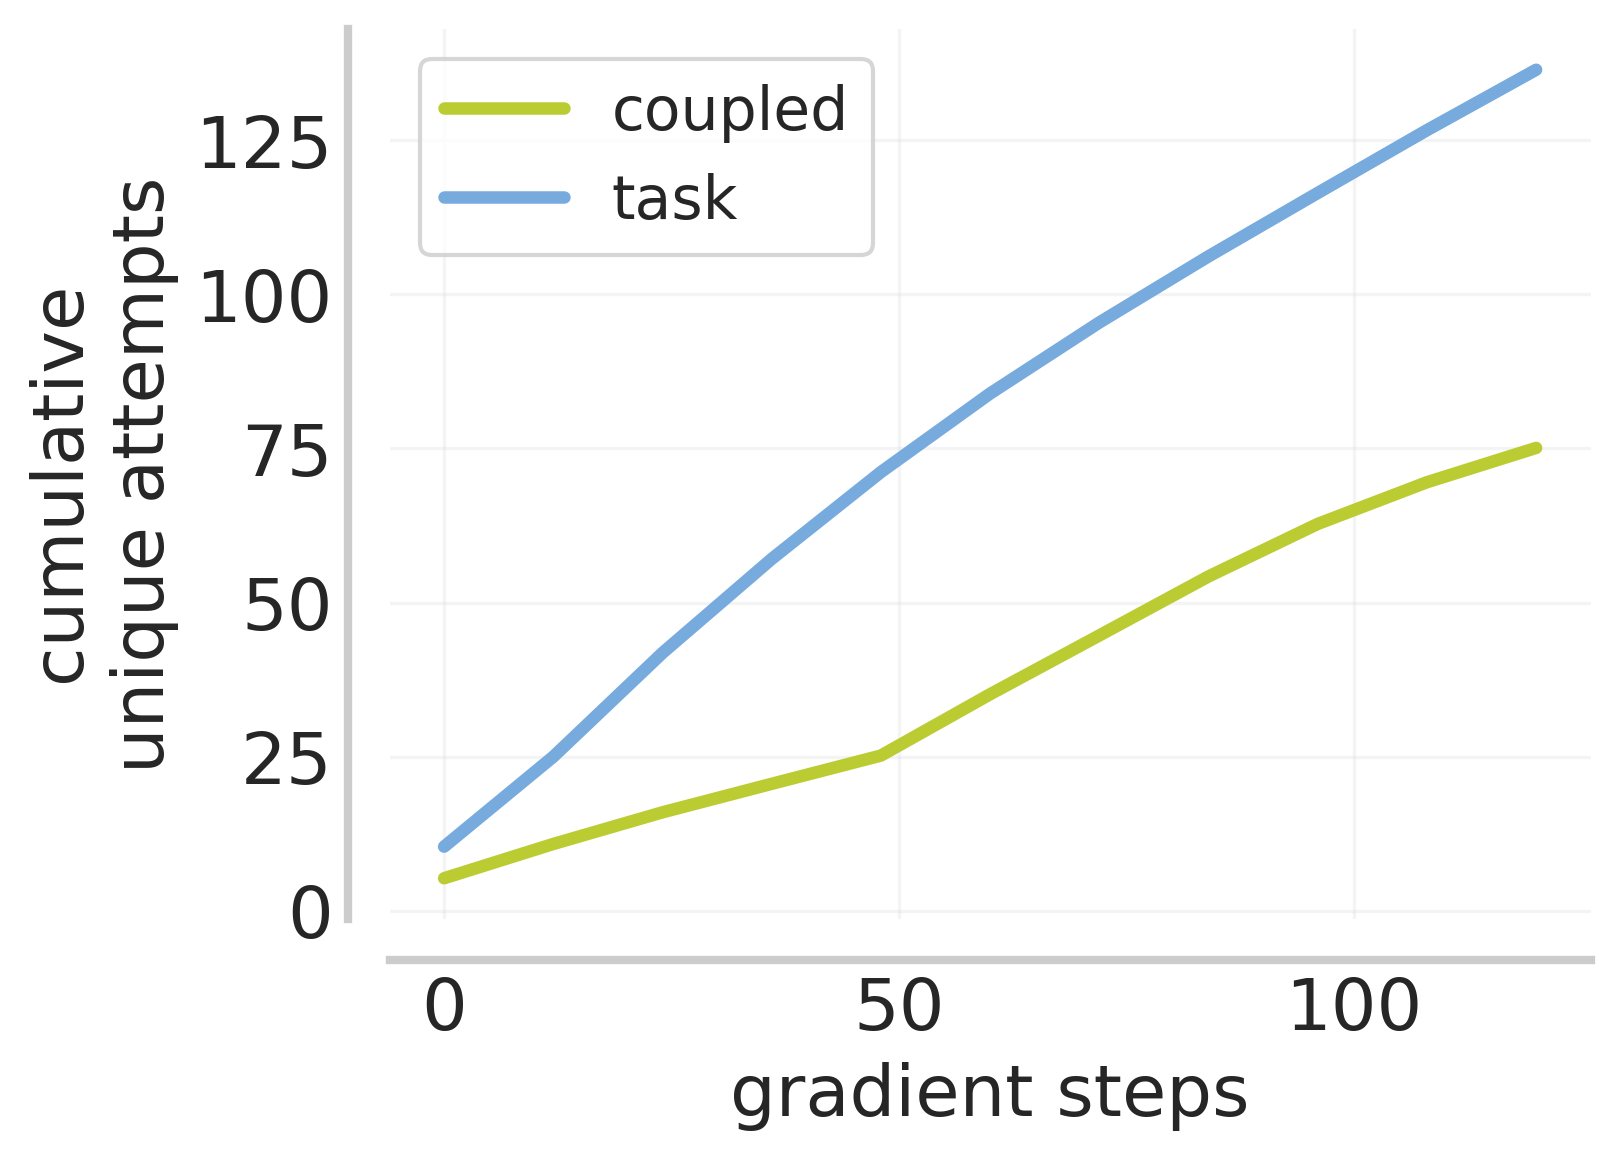

In [54]:
k_fig, k_ax = plt.subplots(nrows=1, ncols=1, dpi=300)
k_fig.set_size_inches(496.0/192*2, 369.6/192*2)

for folder in ['both', 'difficulty']:
    k = []
    problem_to_cum_attempts = defaultdict(set)
    
    for step in range(START_STEP, END_STEP + 1, TEST_FREQ):
        rollouts = folder_to_step_to_rollouts[folder][step]
        problem_to_cur_attempts = defaultdict(set)
        
        attempts = 0
        cur_attempts = 0
        successes = 0
        total = 0
        for i in range(len(rollouts) // 8):
            if rollouts[i * 8]['ref_score'] != 6:
                continue

            for j in range(8):
                rollout = rollouts[i * 8 + j]

                for attempt in set(rollout['output'].split('\n\n')):
                    problem_to_cum_attempts[i].add('\n'.join(extract_equations(attempt)))
                    problem_to_cur_attempts[i].add('\n'.join(extract_equations(attempt)))

                successes += rollout['score']
                total += 1
            
            attempts += len(problem_to_cum_attempts[i])
            cur_attempts += len(problem_to_cur_attempts[i])

        k.append(attempts / total)
        # p.append(successes / cur_attempts)

    if folder == 'both':
        text = r'coupled'
    else:
        text = r'task'

    sns.lineplot(x=range(START_STEP, END_STEP + 1, TEST_FREQ), y=k, ax=k_ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], label=f'{text}', linestyle='-')


plot_utils._annotate_and_decorate_axis(k_ax,
                                        xlabel='gradient steps',
                                        ylabel='cumulative \nunique attempts',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)


ax.legend(
        prop={'size': 16},         # Slightly smaller font
        title='Curriculum',
        title_fontsize=16,
        ncol=1,                    # Keep 1 column
        frameon=False,             # No box
        handlelength=1.2,          # Shrink line length
        handletextpad=0.4,         # Shrink space between marker and text
        borderpad=0.2,             # Shrink border padding inside legend box
        labelspacing=0.3,          # Reduce vertical space between entries
        markerscale=0.8,            # Shrink marker size
        # bbox_to_anchor=(-0.1, 1)
    )

plt.savefig("plots/difficulty/unique_attempts.pdf", bbox_inches='tight',pad_inches=0)

plt.show()

### Equations distribution

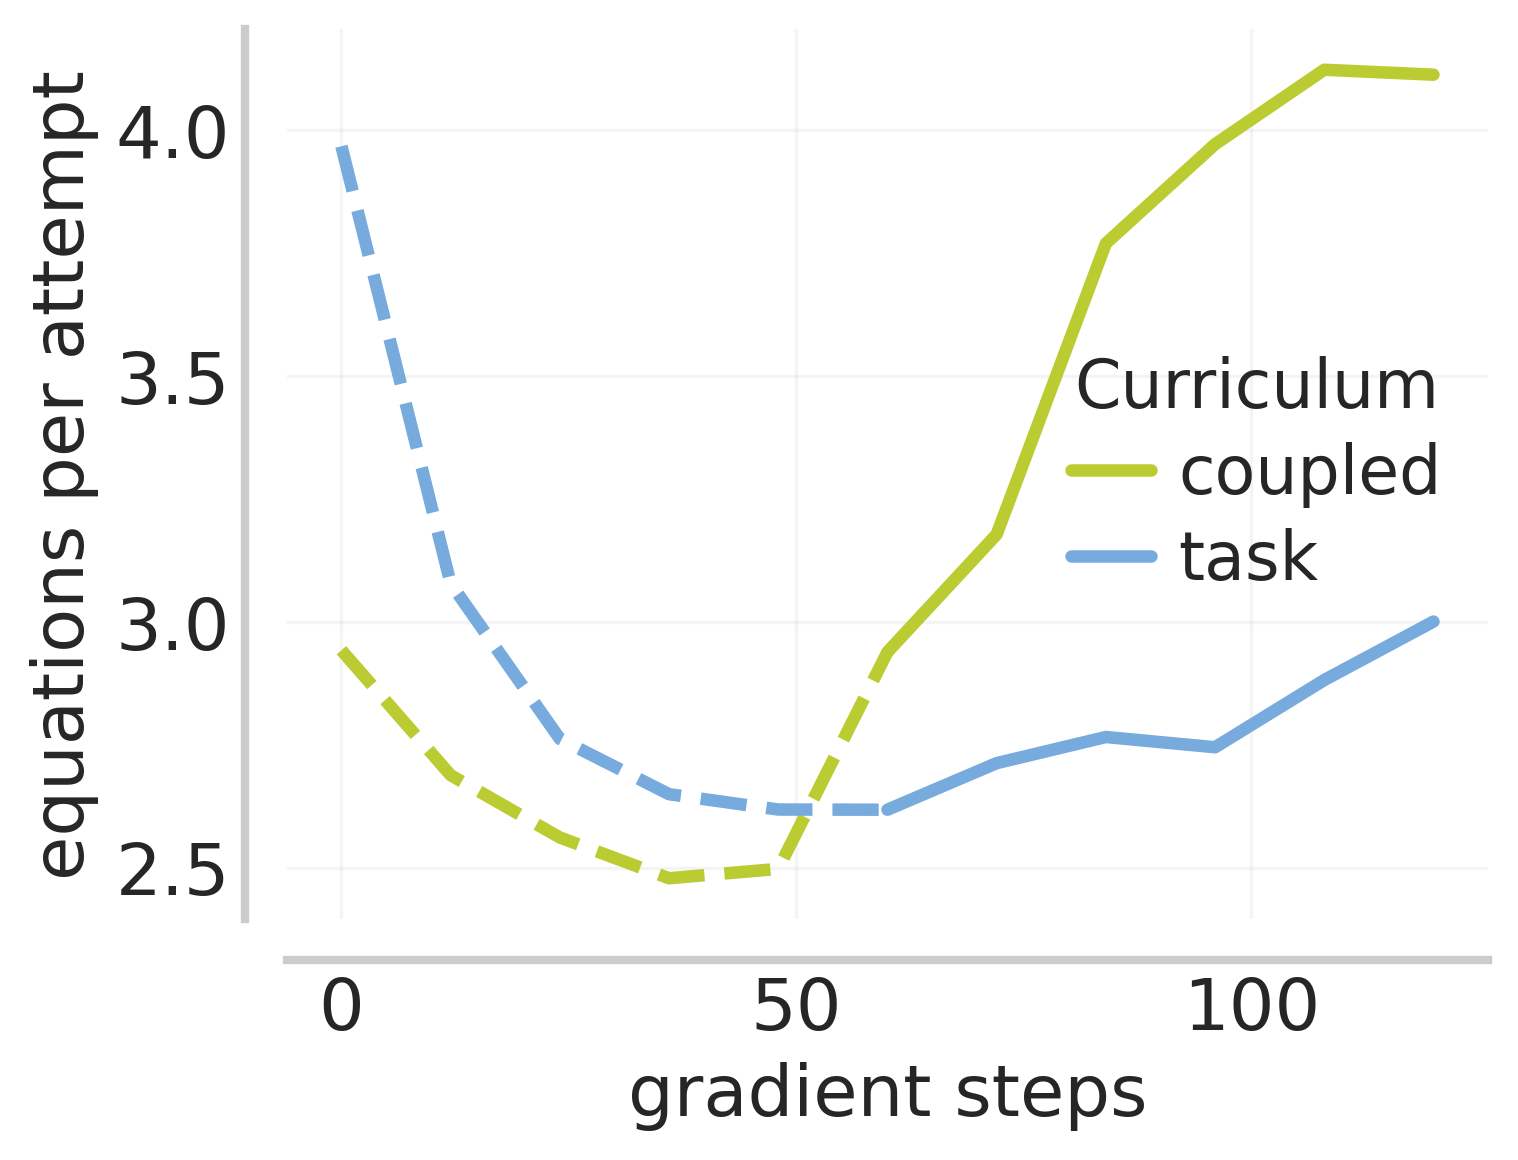

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
fig.set_size_inches(496.0/192*2, 369.6/192*2)

for folder in ['both', 'difficulty']:
    equation_counts = []
    for step in range(START_STEP, END_STEP + 1, TEST_FREQ):
        total_equations = 0
        total = 0
        rollouts = folder_to_step_to_rollouts[folder][step]
        
        total = 0
        for i in range(len(rollouts) // 8):
            if rollouts[i * 8]['ref_score'] != 6:
                continue

            for j in range(8):
                rollout = rollouts[i * 8 + j]

                for attempt in rollout['output'].split('\n\n'):
                    total_equations += len(extract_equations(attempt))
                    total += 1
        
        equation_counts.append(total_equations / total)

    if folder == 'both':
        text = r'coupled'
    else:
        text = r'task'

    x_len = len(range(START_STEP, 60, TEST_FREQ))
    sns.lineplot(x=range(START_STEP, 61, TEST_FREQ), y=equation_counts[:x_len + 1], ax=ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], linestyle='--')
    sns.lineplot(x=range(60, END_STEP + 1, TEST_FREQ), y=equation_counts[x_len:], ax=ax, linewidth=3, markersize=8, color=COLORS[0] if folder == 'both' else COLORS[1], label=f'{text}', linestyle='-')


plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='equations per attempt',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)


ax.legend(
        prop={'size': 16},         # Slightly smaller font
        title='Curriculum',
        title_fontsize=16,
        ncol=1,                    # Keep 1 column
        frameon=False,             # No box
        handlelength=1.2,          # Shrink line length
        handletextpad=0.4,         # Shrink space between marker and text
        borderpad=0.2,             # Shrink border padding inside legend box
        labelspacing=0.3,          # Reduce vertical space between entries
        markerscale=0.8,            # Shrink marker size
        # bbox_to_anchor=(-0.1, 1)
    )

plt.savefig("plots/difficulty/equations_per_attempt.pdf", bbox_inches='tight',pad_inches=0)

plt.show()